## Surface Energy Balance of the Greenland Ice Sheet

In this notebook, you will use data collected by automatic weather stations on the Greenland Ice Sheet to analyze the seasonal surface energy balance. We will use data from a site that is part of the PROMICE network managed by the Geological Survey of Denmark and Greenland (GEUS). You can find more information about PROMICE here: [https://promice.org/](https://promice.org/).   

The map below shows our site of interest. The UPE_U station is located in the Northwest Greenland ablation zone.   

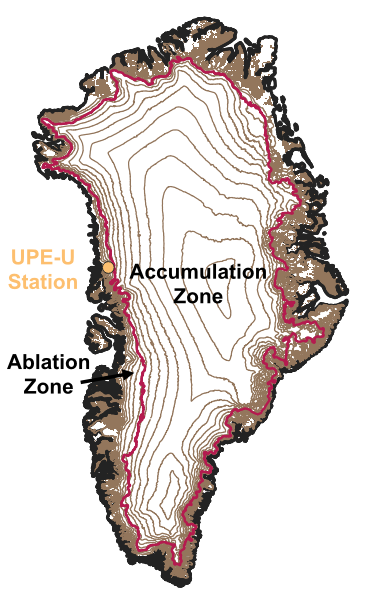

The data we will use in this notebook were collected, processed, and provided by GEUS.   

Fausto, R.S., van As, D., Mankoff, K.D., Vandecrux, B., Citterio, M., Ahlstrøm, A.P., Andersen, S.B., Colgan, W., Karlsson, N.B., Kjeldsen, K.K., Korsgaard, N.J., Larsen, S.H., Nielsen, S., Pedersen, A.Ø., Shields, C.L., Solgaard, A.M., and Box, J.E. (2021) Programme for Monitoring of the Greenland Ice Sheet (PROMICE) automatic weather station data, Earth Syst. Sci. Data, 13, 3819–3845, https://doi.org/10.5194/essd-13-3819-2021

How, P., Wright, P.J., Mankoff, K., Vandecrux, B., Fausto, R.S. and Ahlstrøm, A.P. (2023) pypromice: A Python package for processing automated weather station data, Journal of Open Source Software, 8(86), 5298, https://doi.org/10.21105/joss.05298

How, P., Lund, M.C., Nielsen, R.B., Ahlstrøm, A.P., Fausto, R.S., Larsen, S.H., Mankoff, K.D., Vandecrux, B., Wright, P.J. (2023) pypromice, GEUS Dataverse, https://doi.org/10.22008/FK2/3TSBF0

First, we need to mount our Google Drive so that we can access the data files. Make sure that you have saved the data file (SWGreenlandData.csv) to the Google drive associated with the account you use for Google Colab in a directory called /EAS4940/ProblemSet3.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Next, we will install mpl_interactions and its dependencies so that we can create interactive plots where you can zoom in and out or query data points on the plot. Note that this may take a minute or two to install.

In [ ]:
!pip install mpl_interactions
!pip install ipympl

Then we can enable third-party interactive widgets so that we can use mpl-interactions.

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Now we can import the libraries we will need to data loading and computation and finally load the data from our csv file into a pandas dataframe. This is essentially just a fancy dictionary that holds numpy arrays. Make sure you read the README.txt file provided with the datasets to understand the variables that are included and their units.

In [ ]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_interactions import zoom_factory, panhandler
import pandas as pd
from google.colab import output

# Import the contents of the csv file into a pandas data frame
# Similar to a dictionary, use the keys above to retrieve numpy arrays for each variable
# For example data['thickness'] will give you a numpy array of glacier thicknesses
dtypes = {'Date':'str'}
parse_dates = ['Date']
upe = pd.read_csv('/content/drive/MyDrive/EAS4940/ProblemSet3/AWSData_UPE_U.csv', sep=',', header=0, dtype=dtypes, parse_dates=parse_dates)
dye2 = pd.read_csv('/content/drive/MyDrive/EAS4940/ProblemSet3/AWSData_DYE2.csv', sep=',', header=0, dtype=dtypes, parse_dates=parse_dates)

Below is an example of how to create an interactive plot with mpl-interactions. When you hover of the plot, you should see a menu bar appear on the left-hand side. Clicking on the rectangle symbol will allow you to zoom in and out on the plot by drawing a rectangle around your area of interest. You can query the x and y values of a particular point by hovering your mouse of that point the plot and reading off the results from the text that appears at the bottom of the plot. Clicking the home button will reset your plot to its original state.

This code snippet also shows you how to select only a subset of dates from AWS data for viewing.

In [ ]:
# Create a mask that selects only the portion of our dataframe that falls between
# August 1, 2018 and August 10, 2018
mask = (upe['Date'] > '2018-8-1') & (upe['Date'] <= '2018-8-10')
# Create a new data frame that only contains that subset of information
subset = upe.loc[mask]

plt.close('all')
fig, ax1 = plt.subplots(layout='constrained')
fig.suptitle('Downwelling Shortwave Radiation at UPE-U, Early August')
ax1.plot(subset['Date'],subset['SW_d'])
ax1.set_ylabel('Energy ($Wm^{-2}$)')
ax1.set_xlabel('Date')
ax1.tick_params(labelrotation=45)
fig.set_size_inches(8,5, forward=True)
# Add these two lines to enable the interactive plotting
zoom_factory(ax1)
ph = panhandler(fig, button=2)
# Show the figure
plt.show()

#### Part I: Station UPE-U

**Part 1a:** Plot the individual surface energy balance components at UPE-U for the entire year on one plot. Then use your plot to answer the questions below.   

(1) How does the magnitude of the ground heat flux change on weekly timescales? How does it change on average over the course of the whole year? Explain why in terms of what you know about short timescale and long timescale variations in surface and subsurface temperatures.    

(2) Is sensible heat flux typically positive or negative? What does this tell you about the typical relationship between the air temperature and surface temperature?     

(3) Is latent heat flux typically positive or negative? What does this tell you about the typical relationship between air humidity and surface humidity?   

(4) Which components are most important to the overall energy balance in the winter? Explain the physical conditions that lead to this balance.   

(5) Which components are most important to the overall energy balance in the spring? Explain the physical conditions that lead to this balance.   

**Part 1b:** Calculate and plot the full hourly energy balance at UPE-U for the whole year.

**Part 1c:** Calculate both the hourly melt rate and the cumulative total melt volume for the year and plot both. Then answer the question below.   

(1) When does the melt season start and end? How does this compare to when the energy balance is positive vs negative? Why?  

**Part 1d:** Now **let**'s examine how melt rates change over the course of a few days. Plot both the hourly melt rates and the individual surface energy balance components from June 10, 2018 to June 12, 2018. Use your plots to answer the questions below. Keep in mind that the hour of the day is given in UTC and Greenland's time zone is UTC-2.

(1) Describe how melt rates change over the course of the day. When does the peak melt rate occur each day?

(2) Based on the energy balance components, explain why we observe this diurnal cycle in melt rates.   

**Part 1e:** Now do the same thing as Part 1f but from August 7, 2018 to August 9, 2018. Use the new plots to answer the questions below.   

(1) How do the melt rates differ from what you observed Part 1d?  

(2) Use the surface energy balance components to explain why the peak melting is now at night. What kinds of atmospheric conditions would lead to this kind of energy balance?

**Part 1f:** Calculate the hourly albedo at UPE-U. Use your plot to answer the question below.   

(1) How does the albedo change over the melt season? Why?

**Part 1g:** Calculate the cumulative surface ablation from the energy balance model. Compare your results to the change in surface elevation measured at the weather station. Answer the question below.   

(1) How does the modeled ablation compare to the measured ablation? What might explain any differences?  

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

# Make sure this is set to the location of your notebook in your Google Drive
!cp "/content/drive/MyDrive/Github/glaciology_assignments/PS3_SEB.ipynb" ./

# Change the name of the export file to [NetID]_PS2_BalanceVelocities.ipynb
!jupyter nbconvert --to PDF "PS3_SEB.ipynb"